# OPS808 Final Project: Australia Rainfall
#### Group members who worked on this notebook: Brianna Keegan, Mark Gardiola-Chin, Kevin Eddy, Stacey Koo
##### *** Please note: All codes contained in this notebook are original unless otherwise noted (e.g., "Hitesh's code" or "Enhanced code")

## DATA IMPORT, EXPLORING, AND FEATURE ENGINEERING

In [336]:
#Hitesh's code
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,plot_precision_recall_curve,auc,precision_recall_curve,plot_roc_curve


In [337]:
#Original code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [338]:
#Original code
#Loading of the raw data
df = pd.read_csv('AUSrain.csv')

df.shape
df.head(5)
df.tail(5)
df.describe()

(145460, 18)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,6/21/2017,Uluru,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,6/22/2017,Uluru,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,6/23/2017,Uluru,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,6/24/2017,Uluru,7.8,27.0,0.0,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,6/25/2017,Uluru,14.9,NaN,0.0,NaN,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [339]:
#Original code
#Removal of rows containing NaNs
df.dropna(inplace=True) 
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [340]:
#Original code
#Identification of unique cities in the data
Cities=df['Location'].unique()
Cities

array(['Albury', 'Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland',
       'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Ballarat', 'Bendigo', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa',
       'Woomera', 'PearceRAAF', 'PerthAirport', 'Perth', 'Hobart',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [341]:
#Original code
#Removal of redundant and irrelevant locations: 'PearceRAAF', 'PerthAirport''NorfolkIsland''SydneyAirport''MelbourneAirport' b/c they are either redundant or 
#due to their remote location in the Pacific Ocean
df.drop(df.loc[df['Location']=='NorfolkIsland'].index, inplace=True)
df.drop(df.loc[df['Location']=='PearceRAAF'].index, inplace=True)
df.drop(df.loc[df['Location']=='PerthAirport'].index, inplace=True)
df.drop(df.loc[df['Location']=='SydneyAirport'].index, inplace=True)
df.drop(df.loc[df['Location']=='MelbourneAirport'].index, inplace=True)

In [342]:
# Original code
# Identification of unique cities in the dataset post-removing redundant locations and checking the database shape
df.shape
df['Location'].unique()

(60295, 18)

array(['Albury', 'Cobar', 'CoffsHarbour', 'Moree', 'Richmond', 'Sydney',
       'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Ballarat',
       'Bendigo', 'Sale', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Perth', 'Hobart', 'AliceSprings', 'Darwin',
       'Katherine', 'Uluru'], dtype=object)

In [343]:
#Original code
# Assignment of climate column and assigning of a zone number to each city based on its climate zone
climate= {'Albury': 1, 'Cobar':0,'CoffsHarbour':0, 'Moree':1, 'Richmond': 2, 'Sydney':2, 
          'WaggaWagga':1, 'Williamtown':2, 'Wollongong': 2, 'Canberra':2, 'Ballarat':2,
          'Bendigo':2, 'Sale':2, 'Melbourne':2, 'Mildura':1, 'Portland':2, 'Watsonia':2, 
          'Brisbane':0, 'Cairns':0, 'Townsville':0, 'MountGambier':2, 'Nuriootpa':2, 
          'Woomera':1, 'Perth':2, 'Hobart':2, 'AliceSprings':1, 'Darwin':0, 
          'Katherine':0,'Uluru':1}

# 29 unique cities
# number of cities in the humid climate (0): 7
# number of cities in the hot climate (1): 7
# number of cities in the temperate climate (2):15

#Extraneous information - ignore:
#'BadgerysCreek': 2, 'NorahHead':2,  'Tuggeranong':2, 'Nhil':1, 'Dartmoor':2, 'GoldCoast':0, 'Adelaide':2, 'Witchcliffe':2, 'Walpole':2, 'Launceston':2, 

In [344]:
#Original code
#Copied over the 'location' column, renamed it to 'climate'
df['climate'] = df['Location']
#Recoded 'Location' to 'climate' values as defined in the dictionary above
data=df.replace({'climate': climate})
data2=data.drop(columns=['Location','Date', 'Rainfall','RainTomorrow', 'Cloud9am', 'Cloud3pm'])
data2

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,climate
4,17.5,32.3,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,1
11,15.9,21.7,31.0,15.0,13.0,89.0,91.0,1010.5,1004.2,15.9,17.0,Yes,1
12,15.9,18.6,61.0,28.0,28.0,76.0,93.0,994.3,993.0,17.4,15.8,Yes,1
16,14.1,20.9,22.0,11.0,9.0,69.0,82.0,1012.2,1010.4,17.2,18.1,No,1
17,13.5,22.9,63.0,6.0,20.0,80.0,65.0,1005.8,1002.2,18.0,21.5,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145428,14.6,26.3,37.0,19.0,20.0,61.0,36.0,1022.0,1018.6,15.4,25.0,No,1
145429,14.3,27.6,39.0,0.0,20.0,68.0,27.0,1020.5,1016.1,16.1,27.2,No,1
145432,12.7,22.2,37.0,19.0,13.0,59.0,34.0,1024.3,1021.7,13.9,21.0,No,1
145433,9.4,22.7,35.0,13.0,17.0,62.0,32.0,1026.6,1023.6,11.8,22.3,No,1


In [345]:
#Original code
#Recoding of the label (RainToday) to numeric values
def rain_to_numeric(x):
    if x=='No': return 0
    if x=='Yes': return 1
data2['RainToday1'] = data2['RainToday'].apply(rain_to_numeric)
data2=data2.drop(columns=['RainToday'])
data2


,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,climate,RainToday1
4,17.5,32.3,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,1,0
11,15.9,21.7,31.0,15.0,13.0,89.0,91.0,1010.5,1004.2,15.9,17.0,1,1
12,15.9,18.6,61.0,28.0,28.0,76.0,93.0,994.3,993.0,17.4,15.8,1,1
16,14.1,20.9,22.0,11.0,9.0,69.0,82.0,1012.2,1010.4,17.2,18.1,1,0
17,13.5,22.9,63.0,6.0,20.0,80.0,65.0,1005.8,1002.2,18.0,21.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145428,14.6,26.3,37.0,19.0,20.0,61.0,36.0,1022.0,1018.6,15.4,25.0,1,0
145429,14.3,27.6,39.0,0.0,20.0,68.0,27.0,1020.5,1016.1,16.1,27.2,1,0
145432,12.7,22.2,37.0,19.0,13.0,59.0,34.0,1024.3,1021.7,13.9,21.0,1,0
145433,9.4,22.7,35.0,13.0,17.0,62.0,32.0,1026.6,1023.6,11.8,22.3,1,0


In [346]:
#Original code
# Number of rows by class - to show the problem of an imbalance in the data
classes=data2['RainToday1'].value_counts()
classes
#Determine the proportion of each data class
classes[0]/classes[:]

0    46024
1    14271
Name: RainToday1, dtype: int64

0    1.000000
1    3.225002
Name: RainToday1, dtype: float64

In [347]:
#Original code
#Segment data - data for cities in the humid zone
datahumid=data2.loc[(data2.climate == 0)]
datahumid.shape
datahumid

# Number of rows by class - to check the problem of an imbalance in the data
classeshum=datahumid['RainToday1'].value_counts()
classeshum
#Determine the proportion of each data class
classeshum[0]/classeshum[:]

(16800, 13)

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,climate,RainToday1
6049,17.9,35.2,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,26.6,33.4,0,0
6050,18.4,28.9,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,20.3,27.0,0,0
6052,19.4,37.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,28.7,34.9,0,0
6053,21.9,38.4,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,29.1,35.6,0,0
6054,24.2,41.0,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143181,18.2,35.5,41.0,4.0,22.0,65.0,27.0,1018.4,1014.0,25.2,34.9,0,0
143182,22.6,33.6,46.0,17.0,26.0,53.0,40.0,1020.1,1015.8,26.2,33.0,0,0
143183,17.4,30.7,46.0,22.0,19.0,28.0,42.0,1021.2,1016.5,21.3,30.0,0,0
143185,13.3,32.0,43.0,15.0,22.0,73.0,28.0,1019.2,1015.0,22.1,31.0,0,0


0    12786
1     4014
Name: RainToday1, dtype: int64

0    1.000000
1    3.185351
Name: RainToday1, dtype: float64

In [348]:
#Original code
#Segment data - data for cities in the hot zone
datahot=data2.loc[(data2.climate == 1)]
datahot

# Number of rows by class - to check the problem of an imbalance in the data
classeshot=datahot['RainToday1'].value_counts()
classeshot
#Determine the proportion of each data class
classeshot[0]/classeshot[:]

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,climate,RainToday1
4,17.5,32.3,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,1,0
11,15.9,21.7,31.0,15.0,13.0,89.0,91.0,1010.5,1004.2,15.9,17.0,1,1
12,15.9,18.6,61.0,28.0,28.0,76.0,93.0,994.3,993.0,17.4,15.8,1,1
16,14.1,20.9,22.0,11.0,9.0,69.0,82.0,1012.2,1010.4,17.2,18.1,1,0
17,13.5,22.9,63.0,6.0,20.0,80.0,65.0,1005.8,1002.2,18.0,21.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145428,14.6,26.3,37.0,19.0,20.0,61.0,36.0,1022.0,1018.6,15.4,25.0,1,0
145429,14.3,27.6,39.0,0.0,20.0,68.0,27.0,1020.5,1016.1,16.1,27.2,1,0
145432,12.7,22.2,37.0,19.0,13.0,59.0,34.0,1024.3,1021.7,13.9,21.0,1,0
145433,9.4,22.7,35.0,13.0,17.0,62.0,32.0,1026.6,1023.6,11.8,22.3,1,0


0    11682
1     1976
Name: RainToday1, dtype: int64

0    1.000000
1    5.911943
Name: RainToday1, dtype: float64

In [349]:
#Original code
#Segment data - data for cities in the temperate zone
datatemp=data2.loc[(data2.climate == 2)]
datatemp

# Number of rows by class - to check the problem of an imbalance in the data
classestemp=datatemp['RainToday1'].value_counts()
classestemp
#Determine the proportion of each data class
classestemp[0]/classestemp[:]

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,climate,RainToday1
29026,10.4,17.1,56.0,15.0,22.0,69.0,46.0,997.0,996.2,14.0,14.2,2,0
29027,12.1,19.8,50.0,20.0,28.0,48.0,38.0,1002.5,1005.2,16.7,18.1,2,0
29035,7.6,22.4,24.0,0.0,13.0,94.0,51.0,1030.6,1028.3,14.3,20.4,2,0
29036,11.4,22.8,22.0,17.0,6.0,91.0,53.0,1030.6,1027.1,15.5,21.0,2,0
29042,6.9,24.5,20.0,0.0,13.0,100.0,44.0,1026.6,1022.3,11.2,23.3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133026,7.4,12.1,59.0,11.0,11.0,61.0,42.0,1024.8,1026.4,8.0,10.9,2,1
133027,0.6,10.2,44.0,28.0,22.0,84.0,48.0,1025.9,1020.7,2.6,9.5,2,0
133028,2.6,15.1,72.0,17.0,31.0,67.0,64.0,1006.2,999.4,9.3,11.3,2,0
133029,3.2,10.9,46.0,19.0,20.0,63.0,52.0,1010.2,1009.5,6.2,9.5,2,1


0    21556
1     8281
Name: RainToday1, dtype: int64

0    1.000000
1    2.603067
Name: RainToday1, dtype: float64

## 1. Baseline Model of Choice: Logistic Regression Model

### Logistic Regression - no weights (full sample, no zone delineation)

LogisticRegression()

Train Score:  0.832
Test Score:  0.834
              precision    recall  f1-score   support

           0      0.933     0.861     0.895     19959
           1      0.513     0.703     0.593      4159

    accuracy                          0.834     24118
   macro avg      0.723     0.782     0.744     24118
weighted avg      0.860     0.834     0.843     24118



Text(0.5, 1.0, 'Logistic Regression Model ROC Curve (No Weights, Full Sample)')

Text(0.6, 0.1, 'AUC Score: 0.871')

AUC Score:  0.871


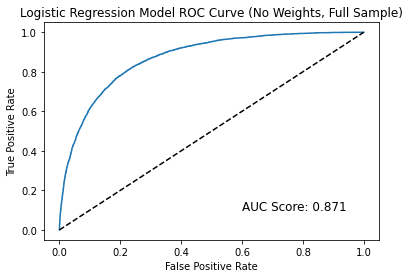

In [350]:
#Original code - from personal notes
#assigning x and y variables
x = data2.drop('RainToday1', axis=1)
y = data2['RainToday1']

# Split the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=0, test_size=0.4)

#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Build the logistic regression model using scikit-learn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100)
lr.fit(x_train,y_train)

#Train vs. Test score
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)
print('Train Score: ', train_score.round(3))
print('Test Score: ',test_score.round(3))

#Enhanced code:
# Accuracy, precision, recall, and F1 score table:
y_pred = lr.predict(x_test)
print(classification_report(y_pred,y_test, digits=3))

#ROC curve & AUC calculation:
prob_test=lr.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, prob_test[:,1])
AUC=metrics.auc(fpr,tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Logistic Regression Model ROC Curve (No Weights, Full Sample)")
plt.text(0.6, 0.1, 'AUC Score: 0.871', fontsize=12)

print('AUC Score: ',AUC.round(3))

### Logistic Regression - w/ weights (full sample, no zone delineation)

LogisticRegression(class_weight={0: 1.0, 1: 3.0})

Train Score:  0.787
Test Score:  0.79
              precision    recall  f1-score   support

           0      0.790     0.924     0.852     15734
           1      0.792     0.539     0.641      8384

    accuracy                          0.790     24118
   macro avg      0.791     0.732     0.746     24118
weighted avg      0.791     0.790     0.779     24118



Text(0.5, 1.0, 'Logistic Regression Model ROC Curve (With Weights, Full Sample)')

Text(0.6, 0.1, 'AUC Score: 0.872')

AUC Score:  0.872


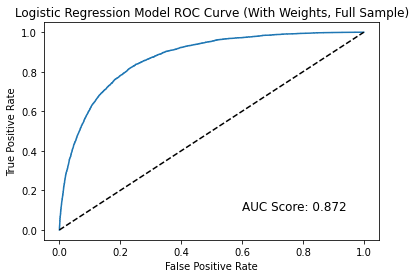

In [351]:
#Original code - from personal notes
#assigning x and y variables
x = data2.drop('RainToday1', axis=1)
y = data2['RainToday1']

# Split the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=0, test_size=0.4)

#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Build the logistic regression model using scikit-learn
from sklearn.linear_model import LogisticRegression
weights={0:1., 1:3.}
lr = LogisticRegression(max_iter=100,class_weight=weights)
lr.fit(x_train,y_train)

#Train vs. Test score
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)
print('Train Score: ', train_score.round(3))
print('Test Score: ',test_score.round(3))

#Enhanced code:
# Accuracy, precision, recall, and F1 score table:
y_pred = lr.predict(x_test)
print(classification_report(y_pred,y_test, digits=3))

#ROC curve & AUC calculation:
prob_test=lr.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, prob_test[:,1])
AUC=metrics.auc(fpr,tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Logistic Regression Model ROC Curve (With Weights, Full Sample)")
plt.text(0.6, 0.1, 'AUC Score: 0.872', fontsize=12)

print('AUC Score: ',AUC.round(3))

### Logistic Regression - no weights (humid, hot, temperate zones)

LogisticRegression()

Train Score:  0.846
Test Score:  0.852
              precision    recall  f1-score   support

           0      0.944     0.873     0.907      5545
           1      0.557     0.754     0.641      1175

    accuracy                          0.852      6720
   macro avg      0.750     0.813     0.774      6720
weighted avg      0.876     0.852     0.860      6720



Text(0.5, 1.0, 'Logistic Regression Model ROC Curve (No Weights, Humid Zone)')

Text(0.6, 0.1, 'AUC Score: 0.876')

AUC Score:  0.876


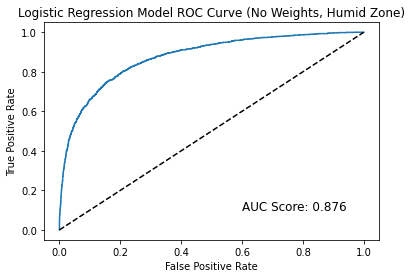

In [352]:

#################################  LOGISTIC REGRESSION, NO WEIGHTS - HUMID ZONE ###############################

#Original code - from personal notes
#assigning x and y variables
x = datahumid.drop('RainToday1', axis=1)
y = datahumid['RainToday1']

# Split the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=0, test_size=0.4)

#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Build the logistic regression model using scikit-learn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100)
lr.fit(x_train,y_train)

#Train vs. Test score
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)
print('Train Score: ', train_score.round(3))
print('Test Score: ',test_score.round(3))

#Enhanced code:
# Accuracy, precision, recall, and F1 score table:
y_pred = lr.predict(x_test)
print(classification_report(y_pred,y_test, digits=3))

#ROC curve & AUC calculation:
prob_test=lr.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, prob_test[:,1])
AUC=metrics.auc(fpr,tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Logistic Regression Model ROC Curve (No Weights, Humid Zone)")
plt.text(0.6, 0.1, 'AUC Score: 0.876', fontsize=12)

print('AUC Score: ',AUC.round(3))

LogisticRegression()

Train Score:  0.907
Test Score:  0.905
              precision    recall  f1-score   support

           0      0.968     0.924     0.946      4897
           1      0.529     0.735     0.615       567

    accuracy                          0.905      5464
   macro avg      0.749     0.830     0.781      5464
weighted avg      0.922     0.905     0.911      5464



Text(0.5, 1.0, 'Logistic Regression Model ROC Curve (No Weights, Hot Zone)')

Text(0.6, 0.1, 'AUC Score: 0.918')

AUC Score:  0.918


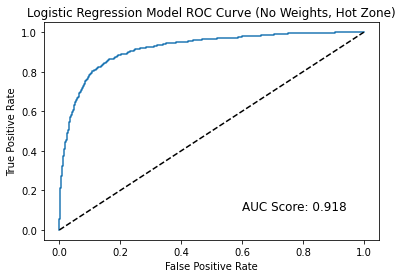

In [353]:

#################################  LOGISTIC REGRESSION, NO WEIGHTS - HOT ZONE ###############################

#Original code - from personal notes
#assigning x and y variables

x = datahot.drop('RainToday1', axis=1)
y = datahot['RainToday1']

# Split the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=0, test_size=0.4)

#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Build the logistic regression model using scikit-learn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100)
lr.fit(x_train,y_train)

#Train vs. Test score
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)
print('Train Score: ', train_score.round(3))
print('Test Score: ',test_score.round(3))

#Enhanced code:
# Accuracy, precision, recall, and F1 score table:
y_pred = lr.predict(x_test)
print(classification_report(y_pred,y_test, digits=3))

#ROC curve & AUC calculation:
prob_test=lr.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, prob_test[:,1])
AUC=metrics.auc(fpr,tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Logistic Regression Model ROC Curve (No Weights, Hot Zone)")
plt.text(0.6, 0.1, 'AUC Score: 0.918', fontsize=12)

print('AUC Score: ',AUC.round(3))

LogisticRegression()

Train Score:  0.798
Test Score:  0.795
              precision    recall  f1-score   support

           0      0.908     0.827     0.865      9520
           1      0.495     0.668     0.569      2415

    accuracy                          0.795     11935
   macro avg      0.701     0.748     0.717     11935
weighted avg      0.824     0.795     0.805     11935



Text(0.5, 1.0, 'Logistic Regression Model ROC Curve (No Weights, Temperate Zone)')

Text(0.6, 0.1, 'AUC Score: 0.837')

AUC Score:  0.837


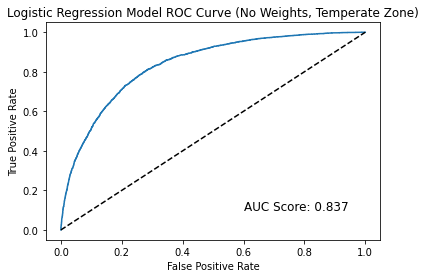

In [354]:

#################################  LOGISTIC REGRESSION, NO WEIGHTS - TEMPERATE ZONE ###############################

#Original code - from personal notes
#assigning x and y variables

x = datatemp.drop('RainToday1', axis=1)
y = datatemp['RainToday1']

# Split the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=0, test_size=0.4)

#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Build the logistic regression model using scikit-learn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100)
lr.fit(x_train,y_train)

#Train vs. Test score
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)
print('Train Score: ', train_score.round(3))
print('Test Score: ',test_score.round(3))

#Enhanced code:
# Accuracy, precision, recall, and F1 score table:
y_pred = lr.predict(x_test)
print(classification_report(y_pred,y_test, digits=3))

#ROC curve & AUC calculation:
prob_test=lr.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, prob_test[:,1])
AUC=metrics.auc(fpr,tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Logistic Regression Model ROC Curve (No Weights, Temperate Zone)")
plt.text(0.6, 0.1, 'AUC Score: 0.837', fontsize=12)

print('AUC Score: ',AUC.round(3))

### Logistic Regression - w/ weights (humid, hot, temperate zones)

LogisticRegression(class_weight={0: 1.0, 1: 3.0})

Train Score:  0.807
Test Score:  0.801
              precision    recall  f1-score   support

           0      0.806     0.924     0.861      4471
           1      0.787     0.557     0.652      2249

    accuracy                          0.801      6720
   macro avg      0.796     0.740     0.756      6720
weighted avg      0.799     0.801     0.791      6720



Text(0.5, 1.0, 'Logistic Regression Model ROC Curve (With Weights, Humid Zone)')

Text(0.6, 0.1, 'AUC Score: 0.876')

AUC Score:  0.876


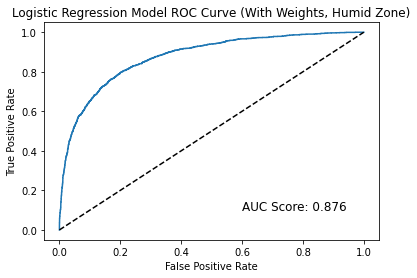

In [355]:

#################################  LOGISTIC REGRESSION, WITH WEIGHTS - HUMID ZONE ###############################

#Original code - from personal notes
#assigning x and y variables

x = datahumid.drop('RainToday1', axis=1)
y = datahumid['RainToday1']

# Split the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=0, test_size=0.4)

#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Build the logistic regression model using scikit-learn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100,class_weight=weights)
weights={0:1., 1:3.}
lr.fit(x_train,y_train)

#Train vs. Test score
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)
print('Train Score: ', train_score.round(3))
print('Test Score: ',test_score.round(3))

#Enhanced code:
# Accuracy, precision, recall, and F1 score table:
y_pred = lr.predict(x_test)
print(classification_report(y_pred,y_test, digits=3))

#ROC curve & AUC calculation:
prob_test=lr.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, prob_test[:,1])
AUC=metrics.auc(fpr,tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Logistic Regression Model ROC Curve (With Weights, Humid Zone)")
plt.text(0.6, 0.1, 'AUC Score: 0.876', fontsize=12)

print('AUC Score: ',AUC.round(3))

LogisticRegression(class_weight={0: 1.0, 1: 3.0})

Train Score:  0.881
Test Score:  0.886
              precision    recall  f1-score   support

           0      0.903     0.961     0.931      4397
           1      0.780     0.576     0.663      1067

    accuracy                          0.886      5464
   macro avg      0.842     0.769     0.797      5464
weighted avg      0.879     0.886     0.879      5464



Text(0.5, 1.0, 'Logistic Regression Model ROC Curve (With Weights, Hot Zone)')

Text(0.6, 0.1, 'AUC Score: 0.918')

AUC Score:  0.918


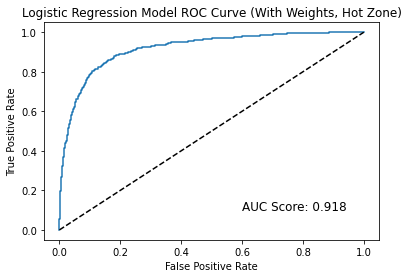

In [356]:

#################################  LOGISTIC REGRESSION, WITH WEIGHTS - HOT ZONE ###############################

#Original code - from personal notes
#assigning x and y variables

x = datahot.drop('RainToday1', axis=1)
y = datahot['RainToday1']

# Split the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=0, test_size=0.4)

#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


#Build the logistic regression model using scikit-learn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100,class_weight=weights)
weights={0:1., 1:6.}
lr.fit(x_train,y_train)

#Train vs. Test score
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)
print('Train Score: ', train_score.round(3))
print('Test Score: ',test_score.round(3))

#Enhanced code:
# Accuracy, precision, recall, and F1 score table:
y_pred = lr.predict(x_test)
print(classification_report(y_pred,y_test, digits=3))

#ROC curve & AUC calculation:
prob_test=lr.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, prob_test[:,1])
AUC=metrics.auc(fpr,tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Logistic Regression Model ROC Curve (With Weights, Hot Zone)")
plt.text(0.6, 0.1, 'AUC Score: 0.918', fontsize=12)
print('AUC Score: ',AUC.round(3))

LogisticRegression(class_weight={0: 1.0, 1: 6.0})

Train Score:  0.658
Test Score:  0.654
              precision    recall  f1-score   support

           0      0.558     0.942     0.701      5144
           1      0.908     0.436     0.589      6791

    accuracy                          0.654     11935
   macro avg      0.733     0.689     0.645     11935
weighted avg      0.757     0.654     0.637     11935



Text(0.5, 1.0, 'Logistic Regression Model ROC Curve (With Weights, Temperate Zone)')

Text(0.6, 0.1, 'AUC Score: 0.838')

AUC Score:  0.838


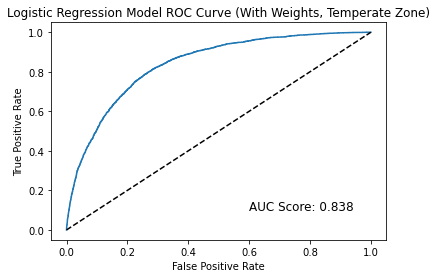

In [357]:

#################################  LOGISTIC REGRESSION, WITH WEIGHTS - TEMPERATE ZONE ###############################

#Original code - from personal notes
#assigning x and y variables

x = datatemp.drop('RainToday1', axis=1)
y = datatemp['RainToday1']

# Split the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=0, test_size=0.4)

#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Build the logistic regression model using scikit-learn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100,class_weight=weights)
weights={0:10., 1:25.}
lr.fit(x_train,y_train)

#Train vs. Test score
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)
print('Train Score: ', train_score.round(3))
print('Test Score: ',test_score.round(3))

#Enhanced code:
# Accuracy, precision, recall, and F1 score table:
y_pred = lr.predict(x_test)
print(classification_report(y_pred,y_test, digits=3))

#ROC curve & AUC calculation:
prob_test=lr.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, prob_test[:,1])
AUC=metrics.auc(fpr,tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Logistic Regression Model ROC Curve (With Weights, Temperate Zone)")
plt.text(0.6, 0.1, 'AUC Score: 0.838', fontsize=12)
print('AUC Score: ',AUC.round(3))

## 2. Advanced Model of Choice: Random Forest Model

### Random Forest Classification Model - w/ weights (full sample, no zone delineation)

RandomForestClassifier(class_weight='balanced', random_state=0)

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

[[13011   781]
 [ 2013  2284]]
              precision    recall  f1-score   support

           0      0.866     0.943     0.903     13792
           1      0.745     0.532     0.620      4297

    accuracy                          0.846     18089
   macro avg      0.806     0.737     0.762     18089
weighted avg      0.837     0.846     0.836     18089



Text(0.5, 1.0, 'ROC curve')

Text(0.5, 0, 'False positve rate')

Text(0, 0.5, 'True positve rate')

Text(0.6, 0.1, 'AUC Score: 0.885')

The AUC score is: 0.885


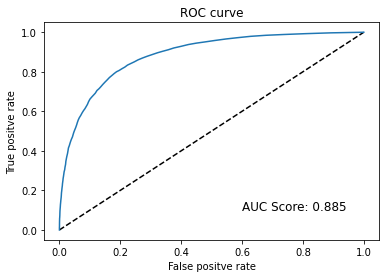

In [358]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Original code - from personal notes
#assigning x and y variables
x = data2.drop('RainToday1', axis=1)
y = data2.RainToday1

# Split the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

# Scale the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Build & fit the Random Forest model
rfc = RandomForestClassifier(n_estimators=100, class_weight = 'balanced', random_state=0) # 100 Trees in the Forest
rfc.fit(x_train, y_train)

# Accuracy, precision, recall and F1 score table:
rfc_pred = rfc.predict(x_test)
rfc_pred
prob_test = rfc.predict_proba(x_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred, digits=3))

#ROC curve & AUC calculation:
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_test[:,1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False positve rate')
plt.ylabel('True positve rate')
plt.text(0.6, 0.1, 'AUC Score: 0.885', fontsize=12)
print('The AUC score is:', metrics.auc(fpr, tpr).round(3))

### Random Forest Classification Model - w/ weights (humid zone)

RandomForestClassifier(class_weight='balanced', random_state=0)

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

[[3703  168]
 [ 511  658]]
              precision    recall  f1-score   support

           0      0.879     0.957     0.916      3871
           1      0.797     0.563     0.660      1169

    accuracy                          0.865      5040
   macro avg      0.838     0.760     0.788      5040
weighted avg      0.860     0.865     0.857      5040



Text(0.5, 1.0, 'ROC curve')

Text(0.5, 0, 'False positve rate')

Text(0, 0.5, 'True positve rate')

Text(0.6, 0.1, 'AUC Score: 0.893')

The AUC score is: 0.893


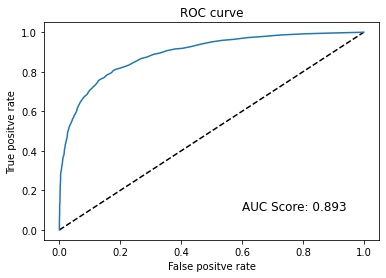

In [359]:
#Original code - from personal notes
#assigning x and y variables
x = datahumid.drop('RainToday1', axis=1)
y = datahumid.RainToday1

# Split the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

# Scale the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Build & fit the Random Forest model
rfc = RandomForestClassifier(n_estimators=100, class_weight = 'balanced', random_state=0) # 100 Trees in the Forest
rfc.fit(x_train, y_train)

# Accuracy, precision, recall and F1 score table:
rfc_pred = rfc.predict(x_test)
rfc_pred
prob_test = rfc.predict_proba(x_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred, digits=3))

#ROC curve & AUC calculation:
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_test[:,1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False positve rate')
plt.ylabel('True positve rate')
plt.text(0.6, 0.1, 'AUC Score: 0.893', fontsize=12)
print('The AUC score is:', metrics.auc(fpr, tpr).round(3))

### Random Forest Classification Model - w/ weights (hot zone)

RandomForestClassifier(class_weight='balanced', random_state=0)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

[[3420   91]
 [ 282  305]]
              precision    recall  f1-score   support

           0      0.924     0.974     0.948      3511
           1      0.770     0.520     0.621       587

    accuracy                          0.909      4098
   macro avg      0.847     0.747     0.784      4098
weighted avg      0.902     0.909     0.901      4098



Text(0.5, 1.0, 'ROC curve')

Text(0.5, 0, 'False positve rate')

Text(0, 0.5, 'True positve rate')

Text(0.6, 0.1, 'AUC Score: 0.911')

The AUC score is: 0.911


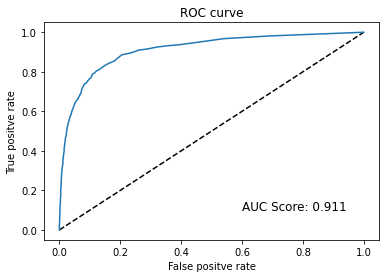

In [360]:
#Original code - from personal notes
#assigning x and y variables
x = datahot.drop('RainToday1', axis=1)
y = datahot.RainToday1

# Split the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

# Scale the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Build & fit the Random Forest model
rfc = RandomForestClassifier(n_estimators=100, class_weight = 'balanced', random_state=0) # 100 Trees in the Forest
rfc.fit(x_train, y_train)

# Accuracy, precision, recall and F1 score table:
rfc_pred = rfc.predict(x_test)
rfc_pred
prob_test = rfc.predict_proba(x_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred,digits=3))

#ROC curve & AUC calculation:
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_test[:,1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False positve rate')
plt.ylabel('True positve rate')
plt.text(0.6, 0.1, 'AUC Score: 0.911', fontsize=12)
print('The AUC score is:', metrics.auc(fpr, tpr).round(3))

### Random Forest Classification Model - w/ weights (temperate zone)

RandomForestClassifier(class_weight='balanced', random_state=0)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

[[5977  520]
 [1277 1178]]
              precision    recall  f1-score   support

           0      0.824     0.920     0.869      6497
           1      0.694     0.480     0.567      2455

    accuracy                          0.799      8952
   macro avg      0.759     0.700     0.718      8952
weighted avg      0.788     0.799     0.786      8952



Text(0.5, 1.0, 'ROC curve')

Text(0.5, 0, 'False positve rate')

Text(0, 0.5, 'True positve rate')

Text(0.6, 0.1, 'AUC Score: 0.840')

The AUC score is: 0.84


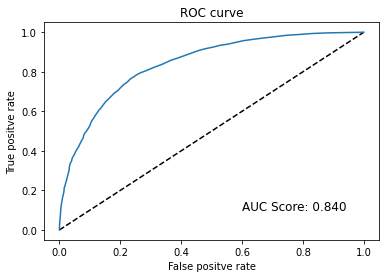

In [414]:
#Original code - from personal notes
#assigning x and y variables
x = datatemp.drop('RainToday1', axis=1)
y = datatemp.RainToday1

# Split the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

# Scale the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Build & fit the Random Forest model
rfc = RandomForestClassifier(n_estimators=100, class_weight = 'balanced', random_state=0) # 100 Trees in the Forest
rfc.fit(x_train, y_train)

# Accuracy, precision, recall and F1 score table:
rfc_pred = rfc.predict(x_test)
rfc_pred
prob_test = rfc.predict_proba(x_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred, digits=3))

#ROC curve & AUC calculation:
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_test[:,1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False positve rate')
plt.ylabel('True positve rate')
plt.text(0.6, 0.1, 'AUC Score: 0.840', fontsize=12)
print('The AUC score is:', metrics.auc(fpr, tpr).round(3))

## 3. Novel Model of Choice: Support Vector Machines

### SVM Classification - w/ weights (full sample, no zone delineation)

In [362]:
#Original code 
#assigning x and y variables

x = data2.drop('RainToday1', axis=1)
y = data2['RainToday1']

# Split the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=0, test_size=0.4)

#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [363]:
#################################  SVM W/ LINEAR KERNEL PARAMETER - WITH WEIGHTS, FULL SAMPLE  #################################

#Build a SVM classifier w/ linear kernel parameter:
from sklearn import svm
weights={0:1., 1:3.}
clf = svm.SVC(kernel='linear', class_weight=weights, random_state=0) # linear kernel
clf.fit(x_train,y_train)

#Predictions on test data
y_pred=clf.predict(x_test)


SVC(class_weight={0: 1.0, 1: 3.0}, kernel='linear', random_state=0)

In [364]:
# Linear kernel classifer's accuracy, precision, recall, and f1-score calculations:
from sklearn import metrics
#Model accuracy:
print("Linear Kernel SVM Model Accuracy: ", metrics.accuracy_score(y_test, y_pred).round(3))

# Model Precision & Recall:
print("Linear Kernel SVM Model Precision: ", metrics.precision_score(y_test, y_pred).round(3))
print("Linear Kernel SVM Model Recall: ", metrics.recall_score(y_test,y_pred).round(3))

#F1 score
print("Linear Kernel SVM Model F1 Score: ", metrics.f1_score(y_test,y_pred).round(3))

Linear Kernel SVM Model Accuracy:  0.789
Linear Kernel SVM Model Precision:  0.536
Linear Kernel SVM Model Recall:  0.798
Linear Kernel SVM Model F1 Score:  0.641


Text(0.5, 1.0, 'Linear Kernel SVM Model ROC Curve')

Text(0.6, 0.1, 'AUC Score: 0.872')

0.872


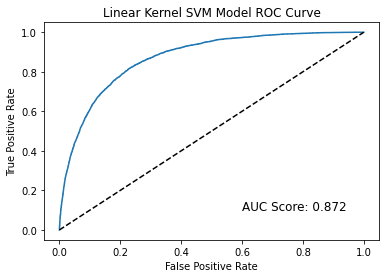

In [366]:
#Linear Kernel SVM Model's ROC Curve and AUC Calculation:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

y_score=clf.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
auc=roc_auc_score(y_test, y_score).round(3)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Linear Kernel SVM Model ROC Curve")
plt.text(0.6, 0.1, 'AUC Score: 0.872', fontsize=12)

print(auc)

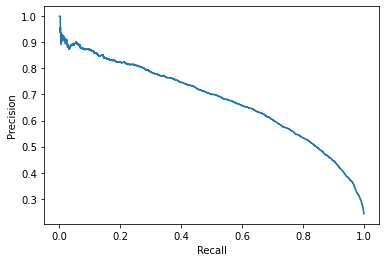

In [367]:
#Linear Kernel SVM Model's Precision Recall Curve:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prc=precision_recall_curve
prd=PrecisionRecallDisplay
prec, recall, _ = prc(y_test, y_score, pos_label=clf.classes_[1])
pr_display = prd(precision=prec, recall=recall).plot()


In [368]:
#################################  SVM W/ POLYNOMIAL KERNEL PARAMETER - WITH WEIGHTS, FULL SAMPLE  #################################

#Build a svm classifier w/ polynomial kernel parameter:
weights={0:1., 1:3.}
clf2 = svm.SVC(kernel='poly', class_weight=weights, random_state=0) # polynomial kernel
clf2.fit(x_train,y_train)

#Predictions on test data
y_pred2=clf2.predict(x_test)


SVC(class_weight={0: 1.0, 1: 3.0}, kernel='poly', random_state=0)

In [369]:
# Polynomial kernel classifer's accuracy, precision, recall, and f1-score calculations:
#Model accuracy:
print("Poly Kernel SVM Model Accuracy: ", metrics.accuracy_score(y_test, y_pred2).round(3))

# Model Precision & Recall:
print("Poly Kernel SVM Model Precision: ", metrics.precision_score(y_test, y_pred2).round(3))
print("Poly Kernel SVM Model Recall: ", metrics.recall_score(y_test,y_pred2).round(3))

#F1 score:
print("Poly Kernel SVM Model F1 Score: ", metrics.f1_score(y_test,y_pred2).round(3))

Poly Kernel SVM Model Accuracy:  0.818
Poly Kernel SVM Model Precision:  0.59
Poly Kernel SVM Model Recall:  0.758
Poly Kernel SVM Model F1 Score:  0.664


Text(0.5, 1.0, 'Polynomial Kernel SVM Model ROC Curve')

Text(0.6, 0.1, 'AUC Score: 0.878')

0.878


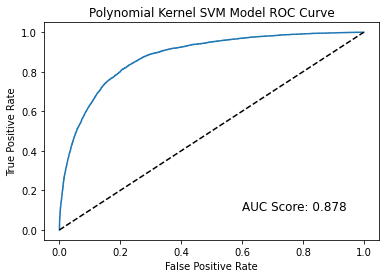

In [371]:
#Polynomial Kernel SVM Model's ROC Curve and AUC Calculation:
y_score2=clf2.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score2, pos_label=clf2.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
auc2=roc_auc_score(y_test, y_score2).round(3)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Polynomial Kernel SVM Model ROC Curve")
plt.text(0.6, 0.1, 'AUC Score: 0.878', fontsize=12)

print(auc2)

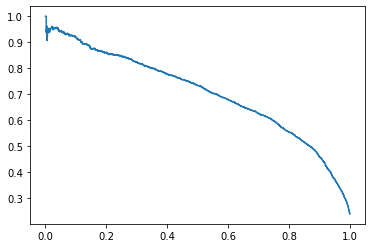

In [372]:
#Polynomial Kernel SVM Model's Precision Recall Curve:
prec, recall, _ = prc(y_test, y_score2, pos_label=clf2.classes_[1])
#pr_display = prd(precision=prec, recall=recall).plot()
plt.plot(recall, prec)

In [373]:
#################################  SVM W/ RBF KERNEL PARAMETER - WITH WEIGHTS, FULL SAMPLE  #################################

#Build a svm classifier w/ radial basis function kernel parameter:
weights={0:1., 1:3.}
clf3 = svm.SVC(kernel='rbf', class_weight=weights, random_state=0) # radial basis function kernel
clf3.fit(x_train,y_train)

#Predictions on test data
y_pred3=clf3.predict(x_test)


SVC(class_weight={0: 1.0, 1: 3.0}, random_state=0)

In [374]:
# RBF kernel classifer's accuracy, precision, recall, and f1-score calculations:
print("RBF Kernel SVM Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3).round(3))

# Model Precision:
print("RBF Kernel SVM Model Precision: ", metrics.precision_score(y_test, y_pred3).round(3))
print("RBF Kernel SVM Model Recall: ", metrics.recall_score(y_test,y_pred3).round(3))

#F1 score
print("RBF Kernel SVM Model F1 Score: ", metrics.f1_score(y_test,y_pred3).round(3))

RBF Kernel SVM Model Accuracy:  0.811
RBF Kernel SVM Model Precision:  0.57
RBF Kernel SVM Model Recall:  0.818
RBF Kernel SVM Model F1 Score:  0.672


Text(0.5, 1.0, 'RBF Kernel SVM Model ROC Curve')

Text(0.6, 0.1, 'AUC Score: 0.891')

0.891


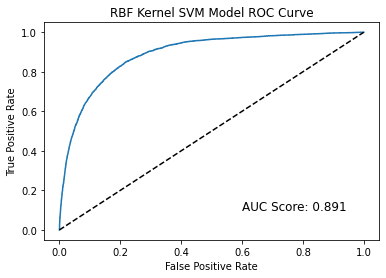

In [376]:
#RBF Kernel SVM Model's ROC Curve and AUC Calculation:
y_score3=clf3.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score3, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
auc3=roc_auc_score(y_test, y_score3).round(3)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("RBF Kernel SVM Model ROC Curve")
plt.text(0.6, 0.1, 'AUC Score: 0.891', fontsize=12)

print(auc3)

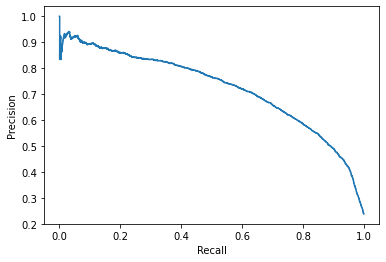

In [377]:
#RBF Kernel SVM Model's Precision Recall Curve:
prec, recall, _ = prc(y_test, y_score3, pos_label=clf3.classes_[1])
pr_display = prd(precision=prec, recall=recall).plot()



Text(0.5, 1.0, 'Linear Kernel SVM Model Confusion Matrix')

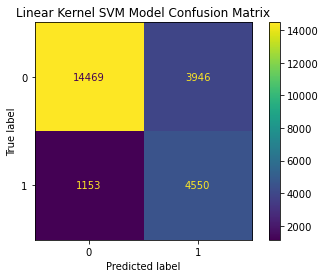

Text(0.5, 1.0, 'Polynomial Kernel SVM Model Confusion Matrix')

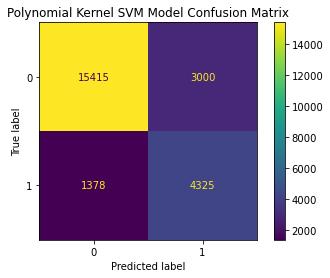

Text(0.5, 1.0, 'RBF Kernel SVM Model Confusion Matrix')

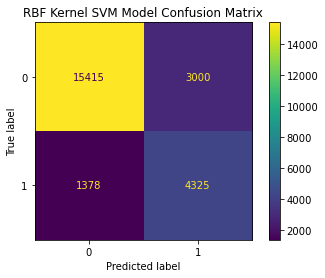

In [378]:
# Confusion matrix for the outcomes of three versions of SVM classifiers:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


#Confusion Matrix of Linear Kernel SVM Model Outcome:
cm=confusion_matrix(y_test, y_pred)
cm1=ConfusionMatrixDisplay(cm).plot()
plt.title("Linear Kernel SVM Model Confusion Matrix")
plt.show()

#Confusion Matrix of Polynomial Kernel SVM Model Outcome:
cm=confusion_matrix(y_test, y_pred2)
cm2=ConfusionMatrixDisplay(cm).plot()
plt.title("Polynomial Kernel SVM Model Confusion Matrix")
plt.show()

#Confusion Matrix of RBF Kernel SVM Model Outcome:
cm=confusion_matrix(y_test, y_pred2)
cm3=ConfusionMatrixDisplay(cm).plot()
plt.title("RBF Kernel SVM Model Confusion Matrix")
plt.show()


### SVM Classification - w/ weights (humid, hot, temperate zones)

#### Humid Climate Zone Model

In [379]:
#Original code 
#assigning x and y variables
x = datahumid.drop('RainToday1', axis=1)
y = datahumid['RainToday1']

# Split the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=0, test_size=0.4)

#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



In [380]:
#################################  SVM W/ LINEAR KERNEL PARAMETER - WITH WEIGHTS, HUMID ZONE  #################################

#Build a SVM classifier w/ linear kernel parameter:
from sklearn import svm
weights={0:1., 1:3.}
clf = svm.SVC(kernel='linear', class_weight=weights, random_state=0) # linear kernel
clf.fit(x_train,y_train)

#Predictions on test data
y_pred=clf.predict(x_test)

# Linear kernel classifer's accuracy, precision, recall, and f1-score calculations:
from sklearn import metrics
#Model accuracy:
print("Linear Kernel SVM Model Accuracy: ", metrics.accuracy_score(y_test, y_pred).round(3))

# Model Precision & Recall:
print("Linear Kernel SVM Model Precision: ", metrics.precision_score(y_test, y_pred).round(3))
print("Linear Kernel SVM Model Recall: ", metrics.recall_score(y_test,y_pred).round(3))

#F1 score
print("Linear Kernel SVM Model F1 Score: ", metrics.f1_score(y_test,y_pred).round(3))

SVC(class_weight={0: 1.0, 1: 3.0}, kernel='linear', random_state=0)

Linear Kernel SVM Model Accuracy:  0.803
Linear Kernel SVM Model Precision:  0.56
Linear Kernel SVM Model Recall:  0.784
Linear Kernel SVM Model F1 Score:  0.653


Text(0.5, 1.0, 'Linear Kernel SVM Model ROC Curve')

Text(0.6, 0.1, 'AUC Score: 0.875')

0.875


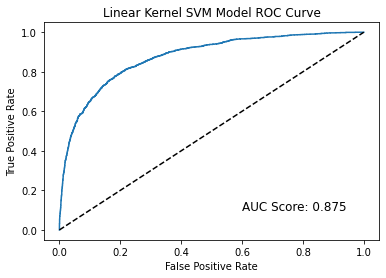

In [381]:
#Linear Kernel SVM Model's ROC Curve and AUC Calculation:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

y_score=clf.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
auc=roc_auc_score(y_test, y_score).round(3)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Linear Kernel SVM Model ROC Curve")
plt.text(0.6, 0.1, 'AUC Score: 0.875', fontsize=12)

print(auc)

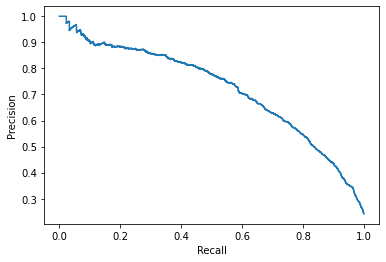

In [382]:
#Linear Kernel SVM Model's Precision Recall Curve:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prc=precision_recall_curve
prd=PrecisionRecallDisplay
prec, recall, _ = prc(y_test, y_score, pos_label=clf.classes_[1])
pr_display = prd(precision=prec, recall=recall).plot()


In [383]:
#################################  SVM W/ POLYNOMIAL KERNEL PARAMETER - WITH WEIGHTS, HUMID ZONE  #################################

#Build a svm classifier w/ polynomial kernel parameter:
weights={0:1., 1:3.}
clf2 = svm.SVC(kernel='poly', class_weight=weights, random_state=0) # polynomial kernel
clf2.fit(x_train,y_train)

#Predictions on test data
y_pred2=clf2.predict(x_test)

# Polynomial kernel classifer's accuracy, precision, recall, and f1-score calculations:
#Model accuracy:
print("Poly Kernel SVM Model Accuracy: ", metrics.accuracy_score(y_test, y_pred2).round(3))

# Model Precision & Recall:
print("Poly Kernel SVM Model Precision: ", metrics.precision_score(y_test, y_pred2).round(3))
print("Poly Kernel SVM Model Recall: ", metrics.recall_score(y_test,y_pred2).round(3))

#F1 score:
print("Poly Kernel SVM Model F1 Score: ", metrics.f1_score(y_test,y_pred2).round(3))

SVC(class_weight={0: 1.0, 1: 3.0}, kernel='poly', random_state=0)

Poly Kernel SVM Model Accuracy:  0.847
Poly Kernel SVM Model Precision:  0.68
Poly Kernel SVM Model Recall:  0.667
Poly Kernel SVM Model F1 Score:  0.673


Text(0.5, 1.0, 'Polynomial Kernel SVM Model ROC Curve')

Text(0.6, 0.1, 'AUC Score: 0.878')

0.878


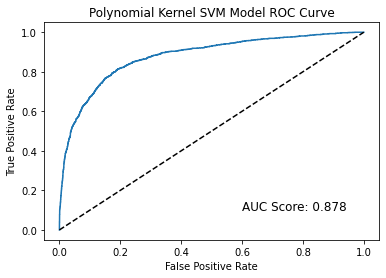

In [384]:
#Polynomial Kernel SVM Model's ROC Curve and AUC Calculation:
y_score2=clf2.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score2, pos_label=clf2.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
auc2=roc_auc_score(y_test, y_score2).round(3)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Polynomial Kernel SVM Model ROC Curve")
plt.text(0.6, 0.1, 'AUC Score: 0.878', fontsize=12)

print(auc2)

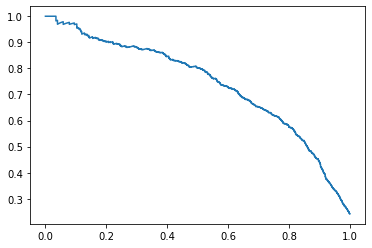

In [385]:
#Polynomial Kernel SVM Model's Precision Recall Curve:
prec, recall, _ = prc(y_test, y_score2, pos_label=clf2.classes_[1])
#pr_display = prd(precision=prec, recall=recall).plot()
plt.plot(recall, prec)

In [386]:
#################################  SVM W/ RADIAL KERNEL PARAMETER - WITH WEIGHTS, HUMID ZONE  #################################

#Build a svm classifier w/ radial basis function kernel parameter:
weights={0:1., 1:3.}
clf3 = svm.SVC(kernel='rbf', class_weight=weights, random_state=0) # radial basis function kernel
clf3.fit(x_train,y_train)

#Predictions on test data
y_pred3=clf3.predict(x_test)

# RBF kernel classifer's accuracy, precision, recall, and f1-score calculations:
print("RBF Kernel SVM Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3).round(3))

# Model Precision:
print("RBF Kernel SVM Model Precision: ", metrics.precision_score(y_test, y_pred3).round(3))
print("RBF Kernel SVM Model Recall: ", metrics.recall_score(y_test,y_pred3).round(3))

#F1 score
print("RBF Kernel SVM Model F1 Score: ", metrics.f1_score(y_test,y_pred3).round(3))

SVC(class_weight={0: 1.0, 1: 3.0}, random_state=0)

RBF Kernel SVM Model Accuracy:  0.834
RBF Kernel SVM Model Precision:  0.614
RBF Kernel SVM Model Recall:  0.803
RBF Kernel SVM Model F1 Score:  0.696


Text(0.5, 1.0, 'RBF Kernel SVM Model ROC Curve')

Text(0.6, 0.1, 'AUC Score: 0.898')

0.898


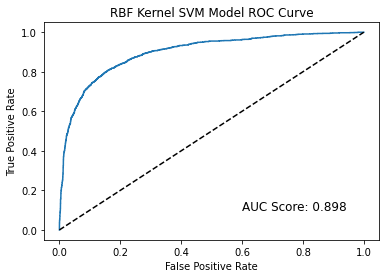

In [387]:
#RBF Kernel SVM Model's ROC Curve and AUC Calculation:
y_score3=clf3.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score3, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
auc3=roc_auc_score(y_test, y_score3).round(3)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("RBF Kernel SVM Model ROC Curve")
plt.text(0.6, 0.1, 'AUC Score: 0.898', fontsize=12)

print(auc3)

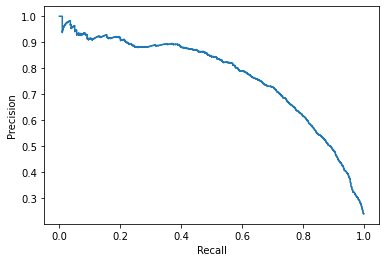

In [388]:
#Linear Kernel SVM Model's Precision Recall Curve:
prec, recall, _ = prc(y_test, y_score3, pos_label=clf3.classes_[1])
pr_display = prd(precision=prec, recall=recall).plot()



Text(0.5, 1.0, 'Linear Kernel SVM Model Confusion Matrix')

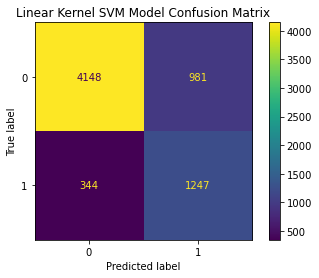

Text(0.5, 1.0, 'Polynomial Kernel SVM Model Confusion Matrix')

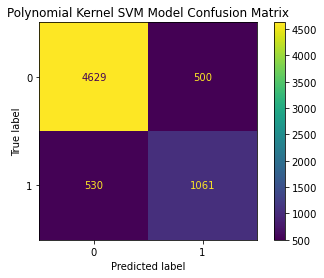

Text(0.5, 1.0, 'RBF Kernel SVM Model Confusion Matrix')

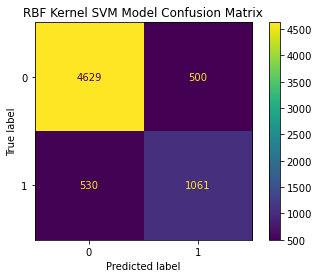

In [389]:
# Confusion matrix for the outcomes of three versions of SVM classifiers:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


#Confusion Matrix of Linear Kernel SVM Model Outcome:
cm=confusion_matrix(y_test, y_pred)
cm1=ConfusionMatrixDisplay(cm).plot()
plt.title("Linear Kernel SVM Model Confusion Matrix")
plt.show()

#Confusion Matrix of Polynomial Kernel SVM Model Outcome:
cm=confusion_matrix(y_test, y_pred2)
cm2=ConfusionMatrixDisplay(cm).plot()
plt.title("Polynomial Kernel SVM Model Confusion Matrix")
plt.show()

#Confusion Matrix of RBF Kernel SVM Model Outcome:
cm=confusion_matrix(y_test, y_pred2)
cm3=ConfusionMatrixDisplay(cm).plot()
plt.title("RBF Kernel SVM Model Confusion Matrix")
plt.show()

#cm3=confusion_matrix(y_test, y_pred2)
#cm_display = ConfusionMatrixDisplay(cm).plot()
#plt.title("RBF Kernel SVM Model Confusion Matrix")
#plt.show()

#### Hot Climate Zone Model

In [390]:

#Original code 
#assigning x and y variables

x = datahot.drop('RainToday1', axis=1)
y = datahot['RainToday1']

# Split the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=0, test_size=0.4)

#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



In [391]:
#################################  SVM W/ LINEAR KERNEL PARAMETER - WITH WEIGHTS, HOT ZONE  #################################

#Build a SVM classifier w/ linear kernel parameter:
from sklearn import svm
weights={0:1., 1:6.}
clf = svm.SVC(kernel='linear', class_weight=weights, random_state=0) # linear kernel
clf.fit(x_train,y_train)

#Predictions on test data
y_pred=clf.predict(x_test)

# Linear kernel classifer's accuracy, precision, recall, and f1-score calculations:
from sklearn import metrics
#Model accuracy:
print("Linear Kernel SVM Model Accuracy: ", metrics.accuracy_score(y_test, y_pred).round(3))

# Model Precision & Recall:
print("Linear Kernel SVM Model Precision: ", metrics.precision_score(y_test, y_pred).round(3))
print("Linear Kernel SVM Model Recall: ", metrics.recall_score(y_test,y_pred).round(3))

#F1 score
print("Linear Kernel SVM Model F1 Score: ", metrics.f1_score(y_test,y_pred).round(3))

SVC(class_weight={0: 1.0, 1: 6.0}, kernel='linear', random_state=0)

Linear Kernel SVM Model Accuracy:  0.837
Linear Kernel SVM Model Precision:  0.465
Linear Kernel SVM Model Recall:  0.858
Linear Kernel SVM Model F1 Score:  0.603


Text(0.5, 1.0, 'Linear Kernel SVM Model ROC Curve')

Text(0.6, 0.1, 'AUC Score: 0.917')

0.917


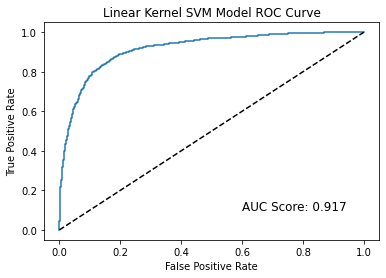

In [393]:
#Linear Kernel SVM Model's ROC Curve and AUC Calculation:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

y_score=clf.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
auc=roc_auc_score(y_test, y_score).round(3)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Linear Kernel SVM Model ROC Curve")
plt.text(0.6, 0.1, 'AUC Score: 0.917', fontsize=12)

print(auc)

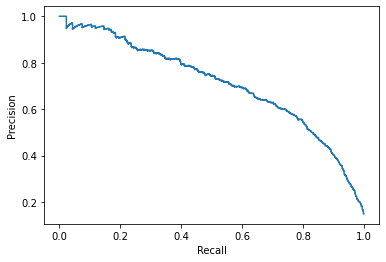

In [394]:
#Linear Kernel SVM Model's Precision Recall Curve:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prc=precision_recall_curve
prd=PrecisionRecallDisplay
prec, recall, _ = prc(y_test, y_score, pos_label=clf.classes_[1])
pr_display = prd(precision=prec, recall=recall).plot()


In [395]:
#################################  SVM W/ POLYNOMIAL KERNEL PARAMETER - WITH WEIGHTS, HOT ZONE  #################################

#Build a svm classifier w/ polynomial kernel parameter:
weights={0:1., 1:6.}
clf2 = svm.SVC(kernel='poly', class_weight=weights, random_state=0) # polynomial kernel
clf2.fit(x_train,y_train)

#Predictions on test data
y_pred2=clf2.predict(x_test)

# Polynomial kernel classifer's accuracy, precision, recall, and f1-score calculations:
#Model accuracy:
print("Poly Kernel SVM Model Accuracy: ", metrics.accuracy_score(y_test, y_pred2).round(3))

# Model Precision & Recall:
print("Poly Kernel SVM Model Precision: ", metrics.precision_score(y_test, y_pred2).round(3))
print("Poly Kernel SVM Model Recall: ", metrics.recall_score(y_test,y_pred2).round(3))

#F1 score:
print("Poly Kernel SVM Model F1 Score: ", metrics.f1_score(y_test,y_pred2).round(3))

SVC(class_weight={0: 1.0, 1: 6.0}, kernel='poly', random_state=0)

Poly Kernel SVM Model Accuracy:  0.886
Poly Kernel SVM Model Precision:  0.58
Poly Kernel SVM Model Recall:  0.763
Poly Kernel SVM Model F1 Score:  0.659


Text(0.5, 1.0, 'Polynomial Kernel SVM Model ROC Curve')

Text(0.6, 0.1, 'AUC Score: 0.911')

0.911


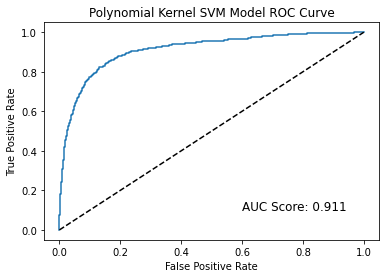

In [397]:
#Polynomial Kernel SVM Model's ROC Curve and AUC Calculation:
y_score2=clf2.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score2, pos_label=clf2.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
auc2=roc_auc_score(y_test, y_score2).round(3)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Polynomial Kernel SVM Model ROC Curve")
plt.text(0.6, 0.1, 'AUC Score: 0.911', fontsize=12)

print(auc2)

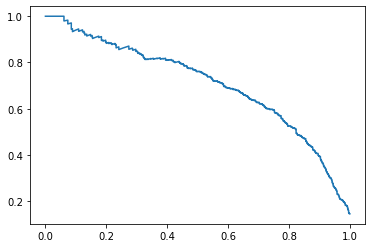

In [398]:
#Polynomial Kernel SVM Model's Precision Recall Curve:
prec, recall, _ = prc(y_test, y_score2, pos_label=clf2.classes_[1])
#pr_display = prd(precision=prec, recall=recall).plot()
plt.plot(recall, prec)

In [399]:
#################################  SVM W/ RBF KERNEL PARAMETER - WITH WEIGHTS, HOT ZONE  #################################

#Build a svm classifier w/ radial basis function kernel parameter:
weights={0:1., 1:6.}
clf3 = svm.SVC(kernel='rbf', class_weight=weights, random_state=0) # radial basis function kernel
clf3.fit(x_train,y_train)

#Predictions on test data
y_pred3=clf3.predict(x_test)

# RBF kernel classifer's accuracy, precision, recall, and f1-score calculations:
print("RBF Kernel SVM Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3).round(3))

# Model Precision:
print("RBF Kernel SVM Model Precision: ", metrics.precision_score(y_test, y_pred3).round(3))
print("RBF Kernel SVM Model Recall: ", metrics.recall_score(y_test,y_pred3).round(3))

#F1 score
print("RBF Kernel SVM Model F1 Score: ", metrics.f1_score(y_test,y_pred3).round(3))

SVC(class_weight={0: 1.0, 1: 6.0}, random_state=0)

RBF Kernel SVM Model Accuracy:  0.853
RBF Kernel SVM Model Precision:  0.494
RBF Kernel SVM Model Recall:  0.852
RBF Kernel SVM Model F1 Score:  0.626


Text(0.5, 1.0, 'RBF Kernel SVM Model ROC Curve')

Text(0.6, 0.1, 'AUC Score: 0.921')

0.921


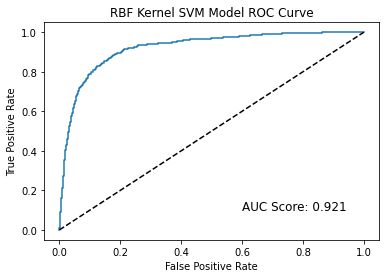

In [400]:
#RBF Kernel SVM Model's ROC Curve and AUC Calculation:
y_score3=clf3.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score3, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
auc3=roc_auc_score(y_test, y_score3).round(3)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("RBF Kernel SVM Model ROC Curve")
plt.text(0.6, 0.1, 'AUC Score: 0.921', fontsize=12)

print(auc3)

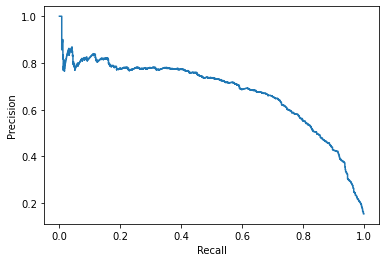

In [401]:
#Linear Kernel SVM Model's Precision Recall Curve:
prec, recall, _ = prc(y_test, y_score3, pos_label=clf3.classes_[1])
pr_display = prd(precision=prec, recall=recall).plot()



Text(0.5, 1.0, 'Linear Kernel SVM Model Confusion Matrix')

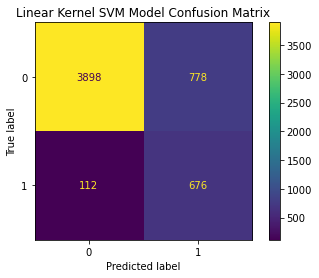

Text(0.5, 1.0, 'Polynomial Kernel SVM Model Confusion Matrix')

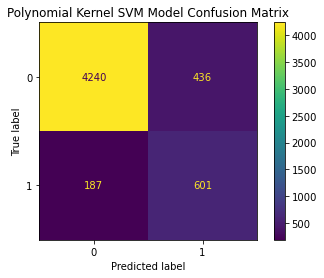

Text(0.5, 1.0, 'RBF Kernel SVM Model Confusion Matrix')

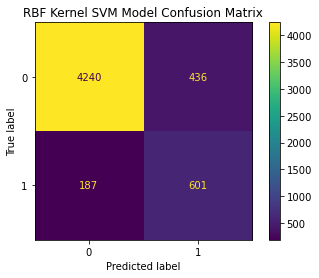

In [402]:
# Confusion matrix for the outcomes of three versions of SVM classifiers:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


#Confusion Matrix of Linear Kernel SVM Model Outcome:
cm=confusion_matrix(y_test, y_pred)
cm1=ConfusionMatrixDisplay(cm).plot()
plt.title("Linear Kernel SVM Model Confusion Matrix")
plt.show()

#Confusion Matrix of Polynomial Kernel SVM Model Outcome:
cm=confusion_matrix(y_test, y_pred2)
cm2=ConfusionMatrixDisplay(cm).plot()
plt.title("Polynomial Kernel SVM Model Confusion Matrix")
plt.show()

#Confusion Matrix of RBF Kernel SVM Model Outcome:
cm=confusion_matrix(y_test, y_pred2)
cm3=ConfusionMatrixDisplay(cm).plot()
plt.title("RBF Kernel SVM Model Confusion Matrix")
plt.show()

#cm3=confusion_matrix(y_test, y_pred2)
#cm_display = ConfusionMatrixDisplay(cm).plot()
#plt.title("RBF Kernel SVM Model Confusion Matrix")
#plt.show()

#### Temperate Climate Zone Model

In [403]:
#Original code 
#assigning x and y variables

x = datatemp.drop('RainToday1', axis=1)
y = datatemp['RainToday1']

# Split the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,  random_state=0, test_size=0.4)

#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



In [404]:
#################################  SVM W/ LINEAR KERNEL PARAMETER - WITH WEIGHTS, TEMPERATE ZONE  #################################

#Build a SVM classifier w/ linear kernel parameter:
from sklearn import svm
weights={0:10., 1:26.}
clf = svm.SVC(kernel='linear', class_weight=weights, random_state=0) # linear kernel
clf.fit(x_train,y_train)

#Predictions on test data
y_pred=clf.predict(x_test)

# Linear kernel classifer's accuracy, precision, recall, and f1-score calculations:
from sklearn import metrics
#Model accuracy:
print("Linear Kernel SVM Model Accuracy: ", metrics.accuracy_score(y_test, y_pred).round(3))

# Model Precision & Recall:
print("Linear Kernel SVM Model Precision: ", metrics.precision_score(y_test, y_pred).round(3))
print("Linear Kernel SVM Model Recall: ", metrics.recall_score(y_test,y_pred).round(3))

#F1 score
print("Linear Kernel SVM Model F1 Score: ", metrics.f1_score(y_test,y_pred).round(3))

SVC(class_weight={0: 10.0, 1: 26.0}, kernel='linear', random_state=0)

Linear Kernel SVM Model Accuracy:  0.756
Linear Kernel SVM Model Precision:  0.536
Linear Kernel SVM Model Recall:  0.782
Linear Kernel SVM Model F1 Score:  0.636


Text(0.5, 1.0, 'Linear Kernel SVM Model ROC Curve')

Text(0.6, 0.1, 'AUC Score: 0.838')

0.838


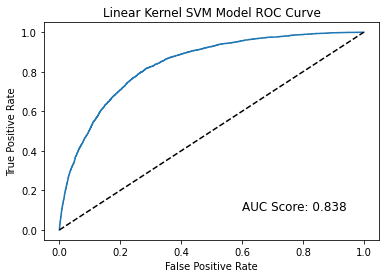

In [405]:
#Linear Kernel SVM Model's ROC Curve and AUC Calculation:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

y_score=clf.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
auc=roc_auc_score(y_test, y_score).round(3)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Linear Kernel SVM Model ROC Curve")
plt.text(0.6, 0.1, 'AUC Score: 0.838', fontsize=12)

print(auc)

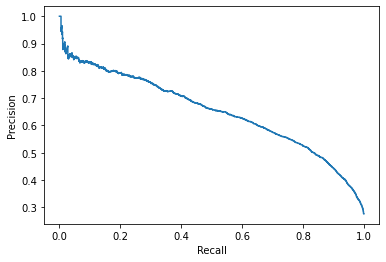

In [406]:
#Linear Kernel SVM Model's Precision Recall Curve:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prc=precision_recall_curve
prd=PrecisionRecallDisplay
prec, recall, _ = prc(y_test, y_score, pos_label=clf.classes_[1])
pr_display = prd(precision=prec, recall=recall).plot()


In [407]:
#################################  SVM W/ POLYNOMIAL KERNEL PARAMETER - WITH WEIGHTS, TEMPERATE ZONE  #################################

#Build a svm classifier w/ polynomial kernel parameter:
weights={0:10., 1:26.}
clf2 = svm.SVC(kernel='poly', class_weight=weights, random_state=0) # polynomial kernel
clf2.fit(x_train,y_train)

#Predictions on test data
y_pred2=clf2.predict(x_test)

# Polynomial kernel classifer's accuracy, precision, recall, and f1-score calculations:
#Model accuracy:
print("Poly Kernel SVM Model Accuracy: ", metrics.accuracy_score(y_test, y_pred2).round(3))

# Model Precision & Recall:
print("Poly Kernel SVM Model Precision: ", metrics.precision_score(y_test, y_pred2).round(3))
print("Poly Kernel SVM Model Recall: ", metrics.recall_score(y_test,y_pred2).round(3))

#F1 score:
print("Poly Kernel SVM Model F1 Score: ", metrics.f1_score(y_test,y_pred2).round(3))

SVC(class_weight={0: 10.0, 1: 26.0}, kernel='poly', random_state=0)

Poly Kernel SVM Model Accuracy:  0.775
Poly Kernel SVM Model Precision:  0.571
Poly Kernel SVM Model Recall:  0.716
Poly Kernel SVM Model F1 Score:  0.635


Text(0.5, 1.0, 'Polynomial Kernel SVM Model ROC Curve')

Text(0.6, 0.1, 'AUC Score: 0.837')

0.837


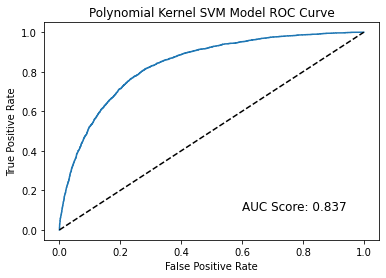

In [408]:
#Polynomial Kernel SVM Model's ROC Curve and AUC Calculation:
y_score2=clf2.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score2, pos_label=clf2.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
auc2=roc_auc_score(y_test, y_score2).round(3)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Polynomial Kernel SVM Model ROC Curve")
plt.text(0.6, 0.1, 'AUC Score: 0.837', fontsize=12)

print(auc2)

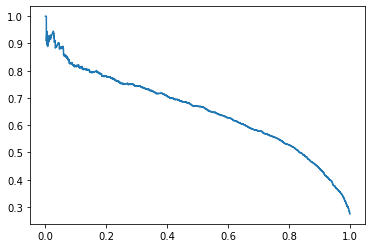

In [409]:
#Polynomial Kernel SVM Model's Precision Recall Curve:
prec, recall, _ = prc(y_test, y_score2, pos_label=clf2.classes_[1])
#pr_display = prd(precision=prec, recall=recall).plot()
plt.plot(recall, prec)

In [410]:
#################################  SVM W/ RBF KERNEL PARAMETER - WITH WEIGHTS, TEMPERATE ZONE  #################################

#Build a svm classifier w/ radial basis function kernel parameter:
weights={0:10., 1:26.}
clf3 = svm.SVC(kernel='rbf', class_weight=weights, random_state=0) # radial basis function kernel
clf3.fit(x_train,y_train)

#Predictions on test data
y_pred3=clf3.predict(x_test)

# RBF kernel classifer's accuracy, precision, recall, and f1-score calculations:
print("RBF Kernel SVM Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3).round(3))

# Model Precision:
print("RBF Kernel SVM Model Precision: ", metrics.precision_score(y_test, y_pred3).round(3))
print("RBF Kernel SVM Model Recall: ", metrics.recall_score(y_test,y_pred3).round(3))

#F1 score
print("RBF Kernel SVM Model F1 Score: ", metrics.f1_score(y_test,y_pred3).round(3))

SVC(class_weight={0: 10.0, 1: 26.0}, random_state=0)

RBF Kernel SVM Model Accuracy:  0.772
RBF Kernel SVM Model Precision:  0.558
RBF Kernel SVM Model Recall:  0.79
RBF Kernel SVM Model F1 Score:  0.654


Text(0.5, 1.0, 'RBF Kernel SVM Model ROC Curve')

Text(0.6, 0.1, 'AUC Score: 0.850')

0.85


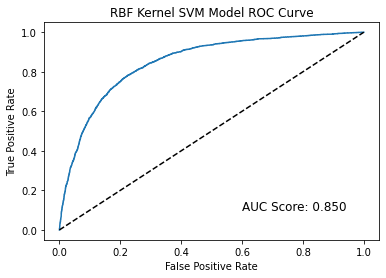

In [411]:
#RBF Kernel SVM Model's ROC Curve and AUC Calculation:
y_score3=clf3.decision_function(x_test)

fpr, tpr, _ = roc_curve(y_test, y_score3, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
auc3=roc_auc_score(y_test, y_score3).round(3)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("RBF Kernel SVM Model ROC Curve")
plt.text(0.6, 0.1, 'AUC Score: 0.850', fontsize=12)

print(auc3)

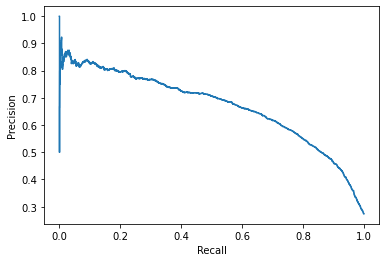

In [412]:
#Linear Kernel SVM Model's Precision Recall Curve:
prec, recall, _ = prc(y_test, y_score3, pos_label=clf3.classes_[1])
pr_display = prd(precision=prec, recall=recall).plot()

Text(0.5, 1.0, 'Linear Kernel SVM Model Confusion Matrix')

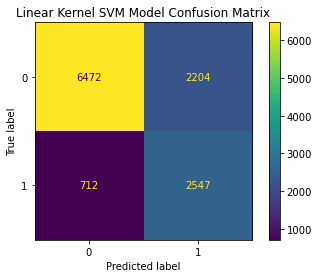

Text(0.5, 1.0, 'Polynomial Kernel SVM Model Confusion Matrix')

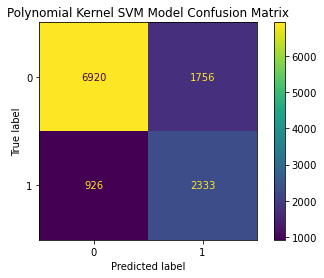

Text(0.5, 1.0, 'RBF Kernel SVM Model Confusion Matrix')

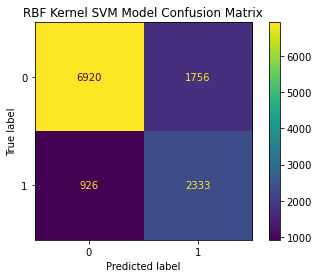

In [413]:
# Confusion matrix for the outcomes of three versions of SVM classifiers:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


#Confusion Matrix of Linear Kernel SVM Model Outcome:
cm=confusion_matrix(y_test, y_pred)
cm1=ConfusionMatrixDisplay(cm).plot()
plt.title("Linear Kernel SVM Model Confusion Matrix")
plt.show()

#Confusion Matrix of Polynomial Kernel SVM Model Outcome:
cm=confusion_matrix(y_test, y_pred2)
cm2=ConfusionMatrixDisplay(cm).plot()
plt.title("Polynomial Kernel SVM Model Confusion Matrix")
plt.show()

#Confusion Matrix of RBF Kernel SVM Model Outcome:
cm=confusion_matrix(y_test, y_pred2)
cm3=ConfusionMatrixDisplay(cm).plot()
plt.title("RBF Kernel SVM Model Confusion Matrix")
plt.show()

#cm3=confusion_matrix(y_test, y_pred2)
#cm_display = ConfusionMatrixDisplay(cm).plot()
#plt.title("RBF Kernel SVM Model Confusion Matrix")
#plt.show()